# Lab 1 Solutions: Mars Eclipses #                             

Start by importing the usual modules and retrieving kernels from the NAIF site (with their subset tool). They provide a metakernel that's nice and labor saving.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice
from mpl_toolkits.mplot3d import Axes3D

spice.furnsh('/Users/shane/Desktop/PTYS_551_code/PTYS_551_kernels/MSL/MSL_META.tm')

The timeframe we're searching is long, so I first do a low-resolution pass (timestep 1000sec) to see what periods are interesting.

In [3]:
dt = 1000
utc1 = '2013-01-01T00:00:00'  
utc2 = '2018-01-01T00:00:00'
et1 = spice.utc2et(utc1) 
et2 = spice.utc2et(utc2)
et   = np.arange(et1,et2, dt)

ang         = np.zeros(len(et))
size_sun    = np.zeros(len(et))
size_phobos = np.zeros(len(et))

tid = spice.bodn2c('PHOBOS')

[num, radii_phobos] = spice.bodvrd('PHOBOS', 'RADII', 3)  # Retrieve Phobos Radii 
[num, radii_sun] = spice.bodvrd('SUN', 'RADII', 3)  # Retrieve Solar Radii 
print(radii_phobos)
print(radii_sun)


[13.  11.4  9.1]
[696000. 696000. 696000.]


At each timestep I calculate the unit vectors from MSL to the Sun and to Phobos. Then I use the dot product to get the angle between them. I also calculate the angular size of the Sun and Phobos in order to know when those bodies overlap in the sky.

In [4]:
for i in range(0,len(et)):
    [starg_sun, ltime] = spice.spkez(10, et[i], 'J2000', 'LT+S', -76)                   # Recover vector from MSL to the Sun
    unit_sun    = starg_sun[0:3] / np.sqrt(np.sum(np.power(starg_sun[0:3],2)))           # Convert to a unit vector
    size_sun[i] = np.power(radii_sun[0]*radii_sun[1]*radii_sun[2],0.3333) / np.sqrt(np.sum(np.power(starg_sun[0:3],2)))
    
    [starg_phobos, ltime] = spice.spkez(tid, et[i], 'J2000', 'LT+S', -76)                  # Recover vector from MSL to PHOBOS
    unit_phobos    = starg_phobos[0:3] / np.sqrt(np.sum(np.power(starg_phobos[0:3],2)))           # Convert to a unit vector     
    size_phobos[i] = np.power(radii_phobos[0]*radii_phobos[1]*radii_phobos[2],0.3333) / np.sqrt(np.sum(np.power(starg_phobos[0:3],2)))

    ang[i]    = np.arccos(np.sum(unit_sun*unit_phobos)) * 180.0/np.pi                     # Use dot product to find angle between vector to PHOBOS and vector to the Sun

A quick plot shows there are five eclipse seasons (that correspond with equinoxs on Mars).

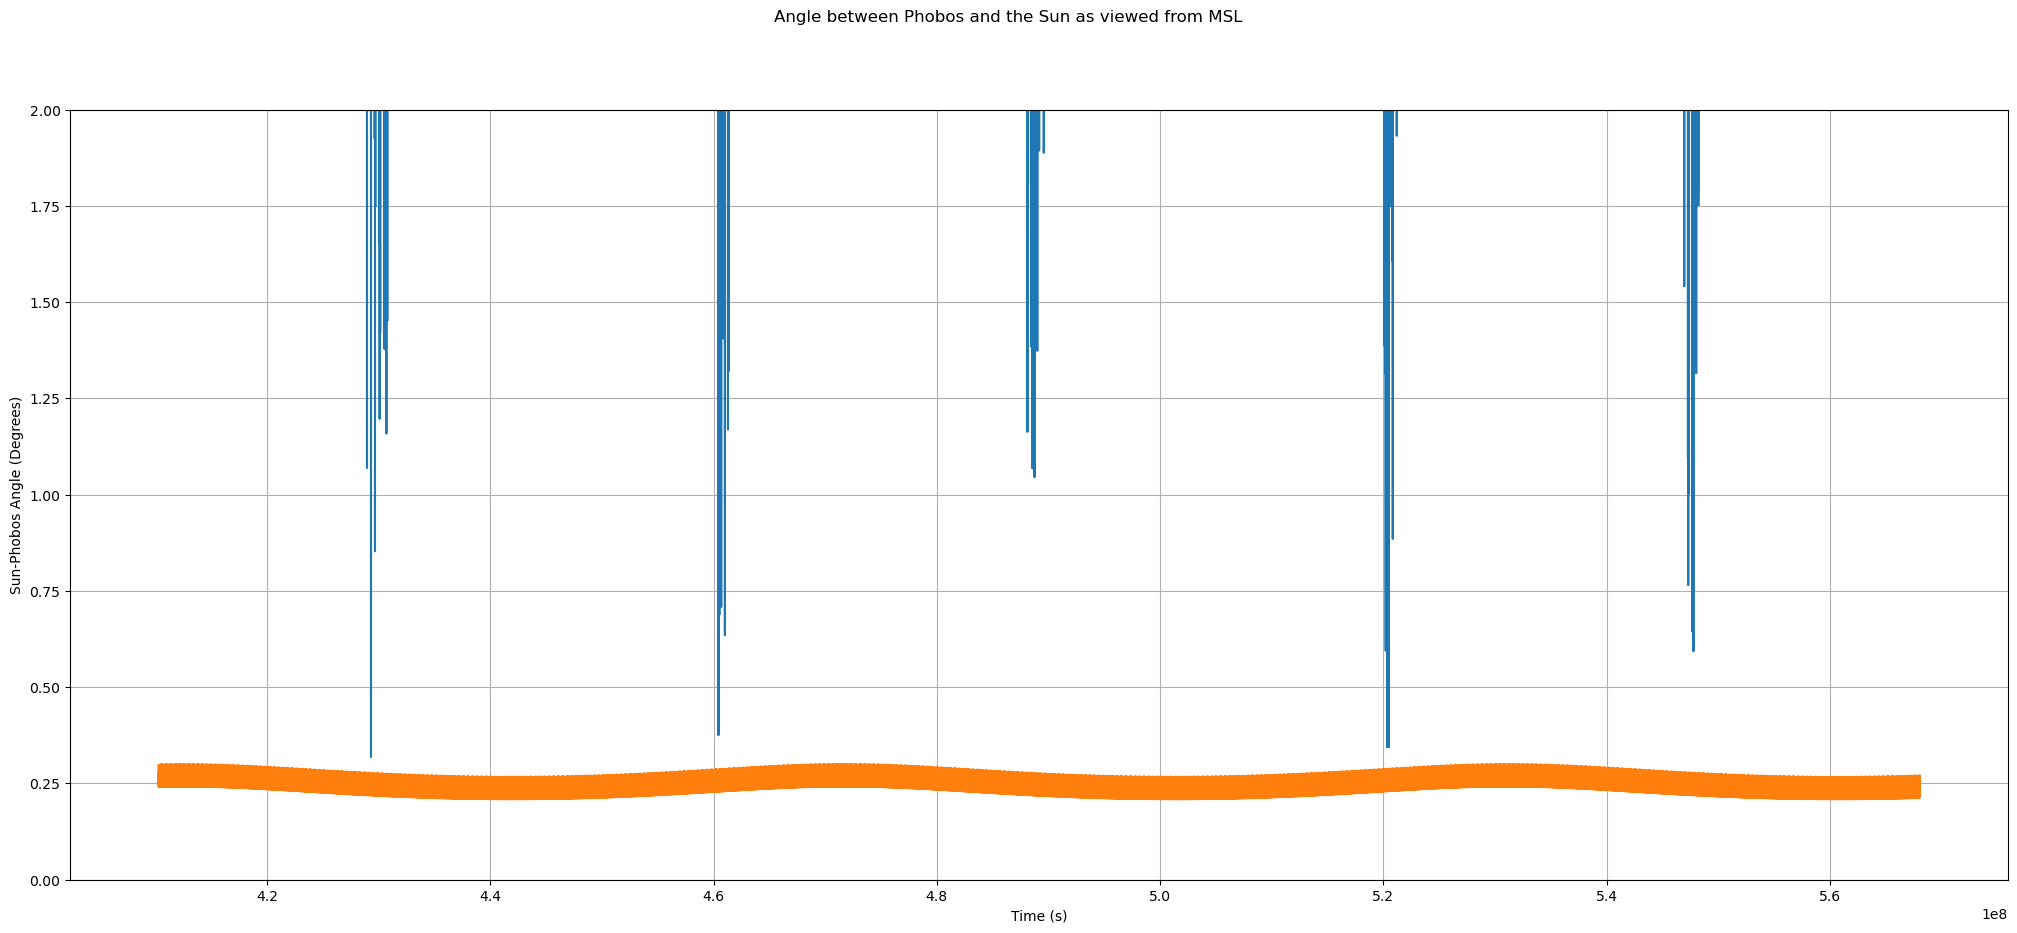

In [5]:
[fig, ax1] = plt.subplots(1,figsize=(25, 10))
fig.suptitle('Angle between Phobos and the Sun as viewed from MSL')

ax1.plot(et, ang)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Sun-Phobos Angle (Degrees)')
ax1.grid(True)
ax1.set_ylim(0,2)
ax1.plot(et, (size_sun+size_phobos)* 180.0/np.pi)


Let's take a closer look and search for the intervals where the Phobos-Sun separation is less than two degrees. It looks like there are no eclipses (blue lines don't cross the orange line); however that's an artefact of the coarse timestep.

[4.28168467e+08 4.59816467e+08 4.87023467e+08 5.19911467e+08
 5.46486467e+08]
[4.30959467e+08 4.61807467e+08 4.90449467e+08 5.21653467e+08
 5.48892467e+08]


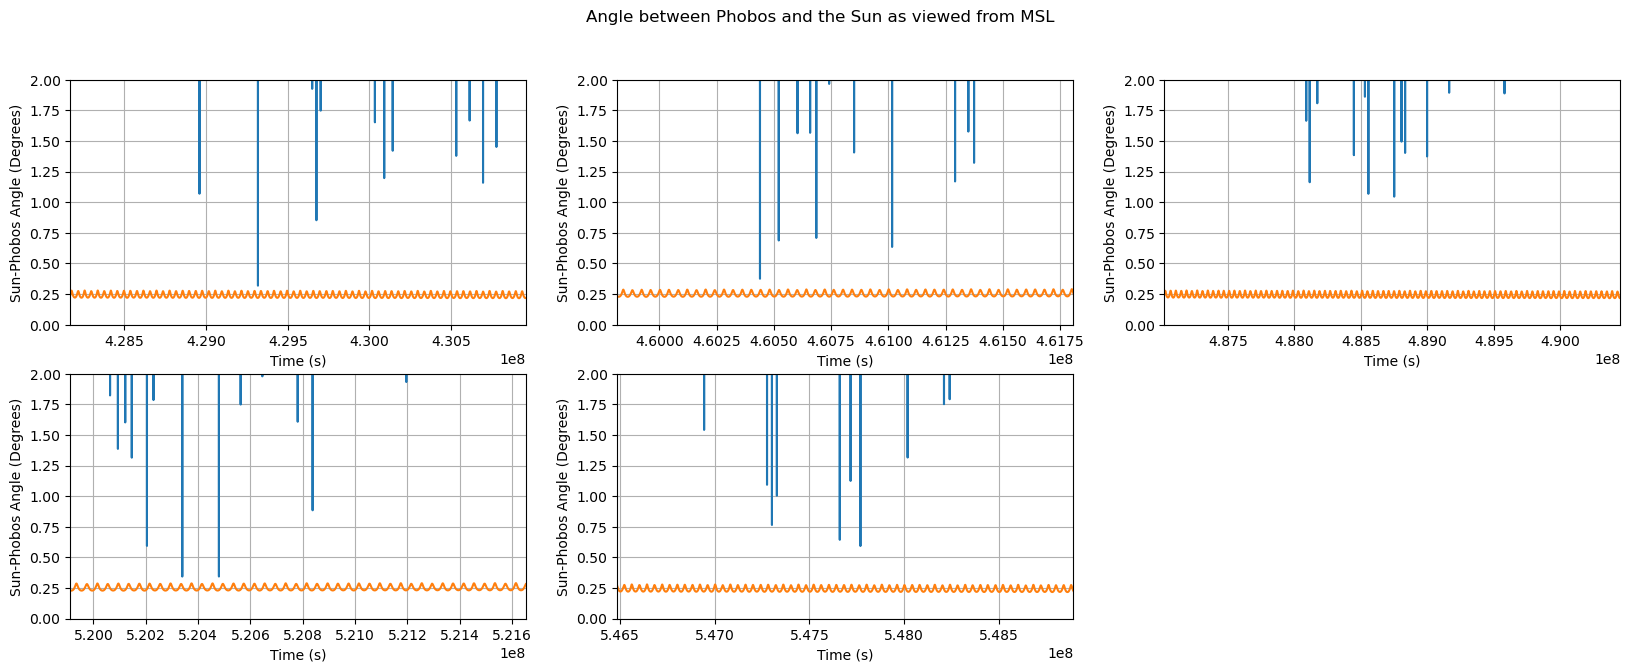

In [6]:
et1 = np.zeros(5)
et2 = np.zeros(5)

et1[0] = min(et[np.where( (et > 4.0e8) & (et < 4.4e8) & (ang < 3.0) )]) - 100000
et1[1] = min(et[np.where( (et > 4.4e8) & (et < 4.8e8) & (ang < 3.0) )]) - 100000
et1[2] = min(et[np.where( (et > 4.8e8) & (et < 5.1e8) & (ang < 3.0) )]) - 100000
et1[3] = min(et[np.where( (et > 5.2e8) & (et < 5.4e8) & (ang < 3.0) )]) - 100000
et1[4] = min(et[np.where( (et > 5.4e8) & (et < 5.6e8) & (ang < 3.0) )]) - 100000

et2[0] = max(et[np.where( (et > 4.0e8) & (et < 4.4e8) & (ang < 3.0) )]) + 100000
et2[1] = max(et[np.where( (et > 4.4e8) & (et < 4.8e8) & (ang < 3.0) )]) + 100000
et2[2] = max(et[np.where( (et > 4.8e8) & (et < 5.1e8) & (ang < 3.0) )]) + 100000
et2[3] = max(et[np.where( (et > 5.2e8) & (et < 5.4e8) & (ang < 3.0) )]) + 100000
et2[4] = max(et[np.where( (et > 5.4e8) & (et < 5.6e8) & (ang < 3.0) )]) + 100000


[fig, ((bx1,bx2,bx3),(cx1,cx2, cx3))] = plt.subplots(2,3,figsize=(20, 7))
fig.suptitle('Angle between Phobos and the Sun as viewed from MSL')

bx1.plot(et, ang)
bx1.set_xlabel('Time (s)')
bx1.set_ylabel('Sun-Phobos Angle (Degrees)')
bx1.grid(True)
bx1.set_ylim(0,2)
bx1.set_xlim(et1[0],et2[0])
bx1.plot(et, (size_sun+size_phobos)* 180.0/np.pi)

bx2.plot(et, ang)
bx2.set_xlabel('Time (s)')
bx2.set_ylabel('Sun-Phobos Angle (Degrees)')
bx2.grid(True)
bx2.set_ylim(0,2)
bx2.set_xlim(et1[1],et2[1])
bx2.plot(et, (size_sun+size_phobos)* 180.0/np.pi)

bx3.plot(et, ang)
bx3.set_xlabel('Time (s)')
bx3.set_ylabel('Sun-Phobos Angle (Degrees)')
bx3.grid(True)
bx3.set_ylim(0,2)
bx3.set_xlim(et1[2],et2[2])
bx3.plot(et, (size_sun+size_phobos)* 180.0/np.pi)

cx1.plot(et, ang)
cx1.set_xlabel('Time (s)')
cx1.set_ylabel('Sun-Phobos Angle (Degrees)')
cx1.grid(True)
cx1.set_ylim(0,2)
cx1.set_xlim(et1[3],et2[3])
cx1.plot(et, (size_sun+size_phobos)* 180.0/np.pi)

cx2.plot(et, ang)
cx2.set_xlabel('Time (s)')
cx2.set_ylabel('Sun-Phobos Angle (Degrees)')
cx2.grid(True)
cx2.set_ylim(0,2)
cx2.set_xlim(et1[4],et2[4])
cx2.plot(et, (size_sun+size_phobos)* 180.0/np.pi)

cx3.axis('off')

print(et1)
print(et2)

Several of these are close... but the timestep is too large to catch the moment of eclipse. Let's do these five intervals at higher resolution (1 sec)...
First we determine all the candidate times when Sun-Phobos separtaion is less than their combined size (higher resolution plots show that eclipses do indeed happen). Second we retrieve illumination angles at MSL to see which of these candidate times is during the day.

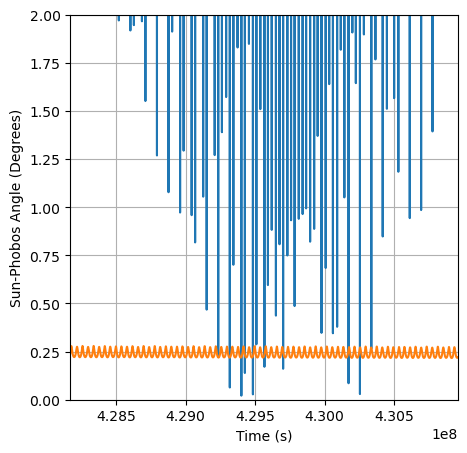

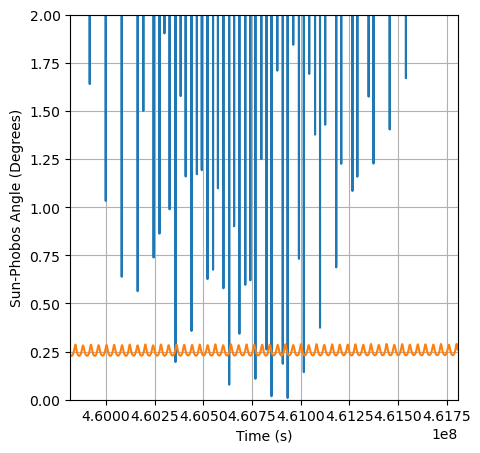

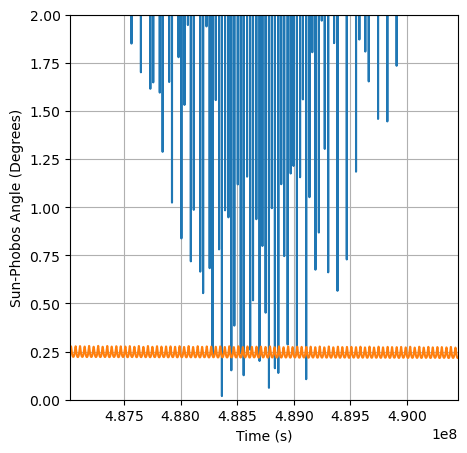

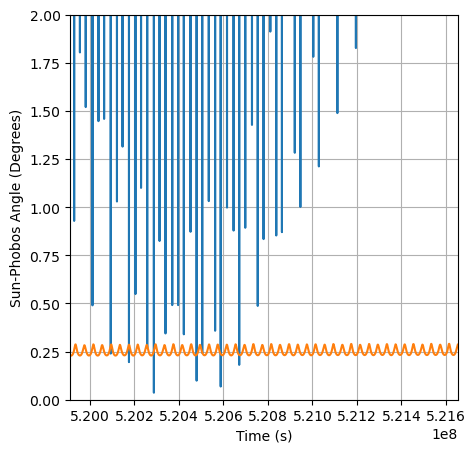

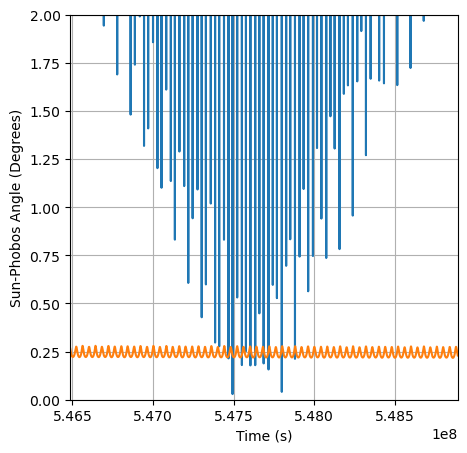

In [7]:
et_answer  = 0
inc_answer = 0
ang_answer = 0

for j in range(0,len(et1)):
    et          = np.arange(et1[j],et2[j], 5)
    ang         = np.zeros(len(et))
    size_sun    = np.zeros(len(et))
    size_phobos = np.zeros(len(et))
    
    for i in range(0,len(et)):
        [starg_sun, ltime] = spice.spkez(10, et[i], 'J2000', 'LT+S', -76)                   # Recover vector from MSL to the Sun
        unit_sun    = starg_sun[0:3] / np.sqrt(np.sum(np.power(starg_sun[0:3],2)))           # Convert to a unit vector
        size_sun[i] = np.power(radii_sun[0]*radii_sun[1]*radii_sun[2],0.3333) / np.sqrt(np.sum(np.power(starg_sun[0:3],2)))
    
        [starg_phobos, ltime] = spice.spkez(tid, et[i], 'J2000', 'LT+S', -76)                  # Recover vector from MSL to PHOBOS
        unit_phobos    = starg_phobos[0:3] / np.sqrt(np.sum(np.power(starg_phobos[0:3],2)))           # Convert to a unit vector     
        size_phobos[i] = np.power(radii_phobos[0]*radii_phobos[1]*radii_phobos[2],0.3333) / np.sqrt(np.sum(np.power(starg_phobos[0:3],2)))

        ang[i]    = np.arccos(np.sum(unit_sun*unit_phobos)) * 180.0/np.pi                     # Use dot product to find angle between vector to Phobos and vector to the Sun
       
    et_candidates  =  et[np.where( ((ang - np.roll(ang,-1)) <= 0) & ((ang - np.roll(ang,1)) <= 0) & (ang <= (size_sun+size_phobos)*180.0/np.pi) )]
    ang_candidates = ang[np.where( ((ang - np.roll(ang,-1)) <= 0) & ((ang - np.roll(ang,1)) <= 0) & (ang <= (size_sun+size_phobos)*180.0/np.pi) )]

    [fig, xx] = plt.subplots(1,figsize=(5, 5))
    xx.plot(et, ang)
    xx.set_xlabel('Time (s)')
    xx.set_ylabel('Sun-Phobos Angle (Degrees)')
    xx.grid(True)
    xx.set_ylim(0,2)
    xx.set_xlim(et1[j],et2[j])
    xx.plot(et, (size_sun+size_phobos)* 180.0/np.pi)
    
    for i in range(0,len(et_candidates)):
        [pos,  ltime]  = spice.spkpos('MSL', et_candidates[i], 'IAU_MARS', 'LT+S', 'MARS')
        [trgepc, srfvec,phase, solar, emissn] = spice.ilumin('ELLIPSOID','MARS', et_candidates[i], 'IAU_MARS', 'LT+S', 'MSL', pos)
        if (solar*180/np.pi < 90):
            et_answer  = np.append(et_answer, et_candidates[i])
            ang_answer = np.append(ang_answer, ang_candidates[i])
            inc_answer = np.append(inc_answer, solar*180/np.pi)

et_answer  =  et_answer[1:]
inc_answer = inc_answer[1:]
ang_answer = ang_answer[1:]


Print out the Results...

In [8]:
print('TIME                  Incidence Angle   Sun-Phobos Separation')
print('-----------------------------------------------------------------')
for j in range(0,len(et_answer)):
    print(et_answer[j],spice.et2utc(et_answer[j],'ISOC',1),inc_answer[j],ang_answer[j])

TIME                  Incidence Angle   Sun-Phobos Separation
-----------------------------------------------------------------
429701592.18393093 2013-08-13T21:32:05.0 69.96173663194746 0.1607979938847974
430172802.18393093 2013-08-19T08:25:35.0 42.49717170384919 0.08556670733949477
430254817.18393093 2013-08-20T07:12:30.0 16.784665966837217 0.029435492552733852
430336742.18393093 2013-08-21T05:57:55.0 16.085449129900727 0.2651030052986452
460357252.18393093 2014-08-03T16:59:45.0 64.07177741086633 0.19596733562141666
460767727.18393093 2014-08-08T11:01:00.0 71.98262088420029 0.10873863346420655
488556387.18393093 2015-06-26T02:05:20.0 83.26243781499898 0.1270391707681667
488832552.18393093 2015-06-29T06:48:05.0 43.481591872422854 0.16343901632882674
488862802.18393093 2015-06-29T15:12:15.0 79.98416447416653 0.13903185982133195
489027322.18393093 2015-07-01T12:54:14.0 28.04157123211728 0.23608280467105855
489109277.18393093 2015-07-02T11:40:09.0 7.671225595477282 0.10660109272340765
52

The third eclipse that happened on 2013-08-20 looks particularly promising! The incidence angle is low, so the Sun is high in the sky and the angle between the center of Phobos and center of the sun is only 0.006 degrees! i.e. Phobos passes roughly through the center of the solar disk. Let's plot the shadow location on Mars over two days centered on this time. If we get it right then we should see it pass through Gale Crater.
The vector of Phobos' shadow direction is opposite to that of Phobos to the sun. Once we know that we should find the intercept location on Mars.

In [9]:
j=2                                                                        # This is the Eclipse of interest...
et = np.arange(et_answer[j]-24.0*3600.0,et_answer[j]+24.0*3600.0,1)          # Set up ephemeris times
[num, radii] = spice.bodvrd('MARS', 'RADII', 3)                            # Retrieve Mars Radii to help conversion to lat/lon

slon = np.zeros(len(et))
slat = np.zeros(len(et))

for j in range(0,len(et)):
    [starg_sun, ltime] = spice.spkez(10, et[j], 'J2000', 'LT+S', 401)               # Recover vector from Phobos (401) to the Sun
    unit_sun    = starg_sun[0:3] / np.sqrt(np.sum(np.power(starg_sun[0:3],2)))      # Convert to a unit vector

    with spice.no_found_check():
        [spoint, trgepc, srfvec,f] = spice.sincpt('ELLIPSOID','MARS',et[j], 'IAU_MARS', 'LT+S','PHOBOS','J2000',-unit_sun) # Note the negative sign in the vector i.e. it's away from the Sun and intercepting Mars somewhere
        [lon, lat, alt] = spice.recpgr('MARS', spoint, radii[0], (radii[0]-radii[2])/radii[0])
        slon[j] =  360.0 - lon *180/np.pi
        slat[j] =  lat *180/np.pi


Plot the shadow location on a background Map and check out Gale crater at higher scale.

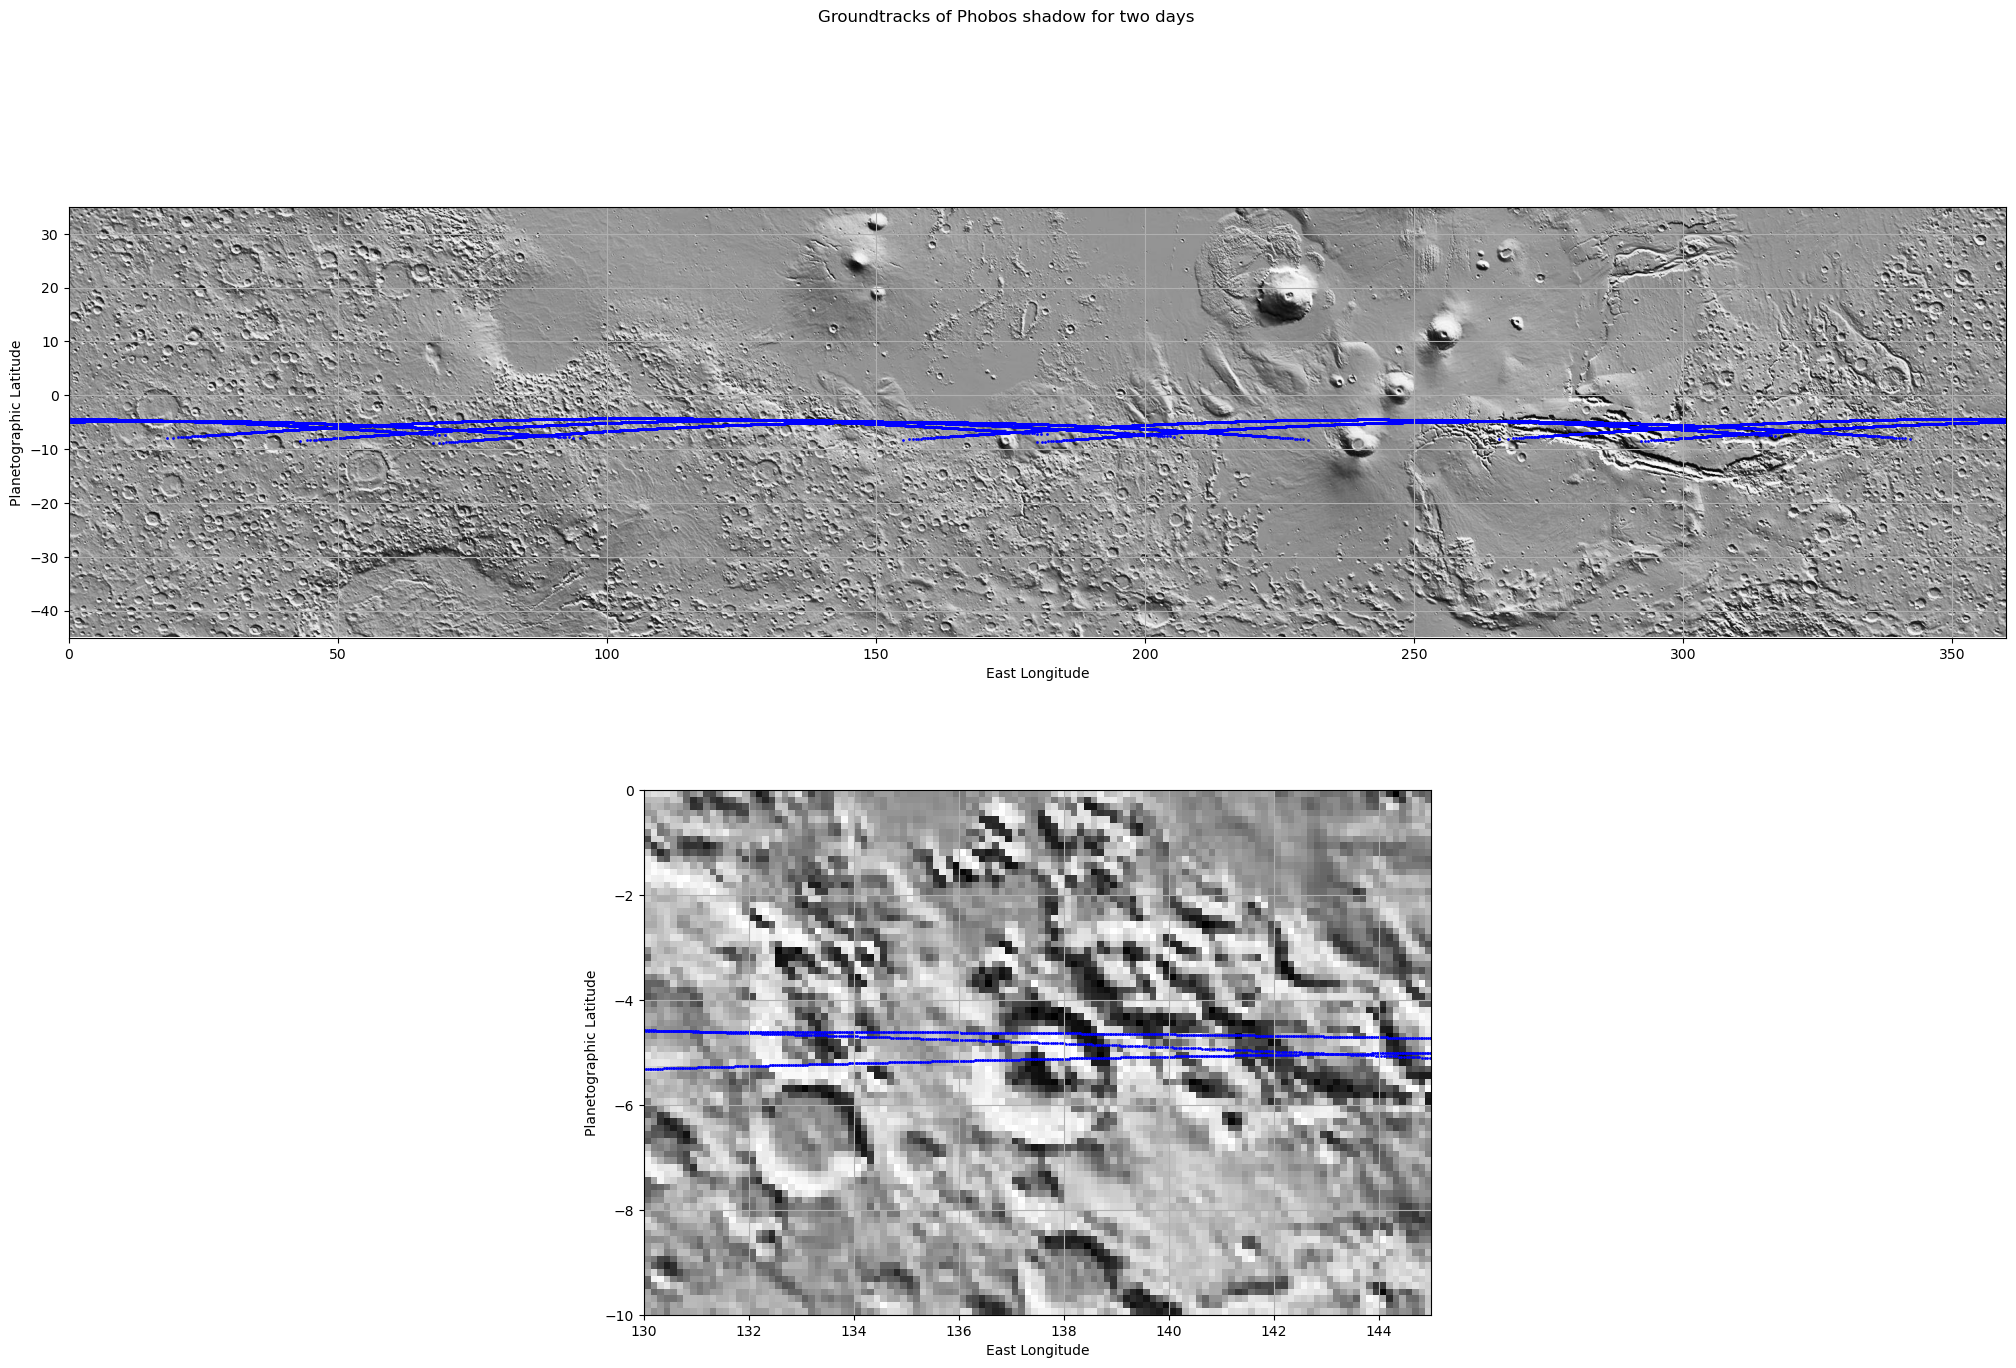

In [10]:
bg = plt.imread('/Users/shane/Documents/class/PTYS_551_2022/notebooks/ced2880x1440.jpg')

fig, (ax,bx) = plt.subplots(2,1,figsize=(25,15))
fig.suptitle('Groundtracks of Phobos shadow for two days')
ax.imshow(bg, extent=[0,360, -90,90])
ax.imshow(bg, extent=[-360,0, -90,90])

ax.scatter(slon,slat,color='#0000ff',s=1)
ax.set_xlabel('East Longitude')
ax.set_ylabel('Planetographic Latitude')
ax.set_ylim(-45,35)
ax.set_xlim(0,360)
ax.grid(True)

bx.imshow(bg, extent=[0,360, -90,90])
bx.imshow(bg, extent=[-360,0, -90,90])

bx.scatter(slon,slat,color='#0000ff',s=1)
bx.set_xlabel('East Longitude')
bx.set_ylabel('Planetographic Latitude')
bx.set_ylim(-10,0)
bx.set_xlim(130,145)
bx.grid(True)